In [1]:
Name = 'Ati tesakulsiri'
ID = 'st123009'

---------------
# Lab 01 Report
---------------
## 0) Objective
- Learning to train and evaluate the PyTorch AlexNet model on the CIFAR-10 dataset.
- Learn how the parameter work.
------------------
## 1) Introduction
The 2012 Imagenet large-scale visual recognition competition was won by Alexnet. The approach was put forth by Alex Krizhevsky and his colleagues in their 2012 research publication, Imagenet Classification with Deep Convolution Neural Network.

They discovered that the training process was nearly six times faster when the relu was used as an activation function. Additionally, they made use of dropout layers, which stopped their model from overfitting. Additionally, the Imagenet dataset is used to train the model. There are almost a thousand classes and nearly 14 million photos in the Imagenet collection.
- ### 1.1 RelU
  - The formula tanh is used to represent a neuron's output (f) as a function of its input. These saturating nonlinearities train with gradient descent far more slowly than the non-saturating nonlinearity. We term AI neurons with this nonlinearity as "rectified linear units," following Nair and Hinton (ReLUs). Deep convolutional neural networks that use ReLUs can learn much more quickly than those that use tanh units.  
- ### 1.2 Convolutional layer parameters

  - The number of parameters $k$ in a kernel for a 2D convolution operation is

$$k = k_w k_h i_c,$$

  - where $k_w$ is the width of the kernel, $k_h$ is the width of kernel, and $i_c$ is the number input channels.
If we have $o_c$ kernels producing $o_c$ output channels, the total number of parameters/weights can be calculated as

$$n_p = k o_c = k_w k_h i_c o_c.$$

  - The bias weight in a convolution operation is optional. It's not needed if you apply normalization procedures such as
batch normalization (almost always done in modern networks), but it is important if you're not using batch normalization.
In that case, the number of biases is equal to the number of kernels:

$$n_p = k_w k_h i_c o_c + o_c.$$

They discovered that the training process was nearly six times faster when the relu was used as an activation function. Additionally, they made use of dropout layers, which stopped their model from overfitting. Additionally, the Imagenet dataset is used to train the model. There are almost a thousand classes and nearly 14 million photos in the Imagenet collection.

- ### 1.3 Alexnet
  - The 2012 Imagenet large-scale visual recognition competition was won by Alexnet. The approach was put forth by Alex Krizhevsky and his colleagues in their 2012 research publication, Imagenet Classification with Deep Convolution Neural Network.


---------------

## 2) Lab method

parameter and hyper paramenter we use
- for img augmentation
    - we perform `Resize((70, 70))`,
    - `RandomHorizontalFlip()`
    - `RandomCrop(64)` for trainset of data
    - <br>
    - we perform `Resize((70, 70))`,
    - `RandomHorizontalFlip()`
    - `CenterCrop(64)` for testset of data
    <br><br>
- for Alexnet model we change the last output size to match the num output
``` python 
AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=4096, out_features=4096, bias=True)
    (5): ReLU(inplace=True)
    (6): Linear(in_features=4096, out_features=10, bias=True)
  )
)
```

- Number of data to train,val,test
  - we train with 40000 image,
  - 10000 val,
  - 10000 test image 
  - with 256 batch sizze

- Hyper parameter 
  - Here is our hyper parameter set in pytorch
``` python
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(alexnet.parameters(),lr = 0.005,momentum=.9)
    alexnet.to(device)
    num_epoch = 80
```

#### 2.1 Setting

In [2]:
# Alexnet lab learning
# setting
import torch
import urllib
import torchvision
import os
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
os.environ['http_proxy'] = 'http://192.41.170.23:3128'
os.environ['https_proxy'] = 'http://192.41.170.23:3128'

In [3]:
# check the puffer nvidia cuda available
!nvidia-smi

Thu Jan 19 13:58:17 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:84:00.0 Off |                  N/A |
| 24%   39C    P2    61W / 250W |   3202MiB / 11264MiB |      6%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  On   | 00000000:85:00.0 Off |                  N/A |
| 22%   

#### 2.2 Modeling
After finish the setting now let load the non train alexnet template.<br>
Incase we build with pytorch the model should be create manually like this
``` Python
features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=4096, out_features=4096, bias=True)
    (5): ReLU(inplace=True)
    (6): Linear(in_features=4096, out_features=1000, bias=True)
  )
)
```

  
In this lab I will load the template directly from pytorch.

In [4]:
alexnet = torch.hub.load('pytorch/vision:v0.11.2', 'alexnet', pretrained=False)

alexnet.classifier = torch.nn.Sequential(
    torch.nn.Dropout(0.5),
    torch.nn.Linear(9216,4096 ), #why like this?  Because Chaky tried already....
    torch.nn.ReLU(inplace=True),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(4096, 4096),
    torch.nn.ReLU(inplace= True),
    torch.nn.Linear(4096,10))

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.11.2


In [5]:
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

#### 2.3 Dataset loading
- Ref for upsize of the imgage (https://github.com/rasbt)

In [32]:
train_transform = transforms.Compose([
    transforms.Resize((70, 70)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(64),
    transforms.ToTensor(),

])


test_transform = transforms.Compose([
    transforms.Resize((70, 70)),
    transforms.CenterCrop(64), 
    transforms.ToTensor(),

])

In [33]:
trainset = torchvision.datasets.CIFAR10(root='data_keep', train=True,
                                        download=True, transform=train_transform)


testset = torchvision.datasets.CIFAR10(root='data_keep', train=False,
                                       download=True, transform=test_transform)


Files already downloaded and verified
Files already downloaded and verified


In [34]:
train_set, val_set = torch.utils.data.random_split(trainset, [40000, 10000])


In [35]:
batch_size = 256
train_loader = DataLoader(train_set,batch_size=batch_size,   shuffle=True)
val_loader   = DataLoader(val_set,  batch_size=batch_size,   shuffle=True)
test_loader  = DataLoader(testset, batch_size=batch_size,   shuffle=False)

In [36]:
device = torch.device('cuda:2' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=2)

### 2.4 Training

In [37]:
NEW_TRAIN = False

In [42]:
if NEW_TRAIN:
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(alexnet.parameters(),lr = 0.005,momentum=.9)
    alexnet.to(device)
    num_epoch = 80
    val_old_loss = float("Inf")
    train_loss_log = []
    train_acc_log = []
    val_acc_log = []
    val_loss_log = []
    filepath = "root/models/cifaralex2.pt"
    for e in range(num_epoch):
        total_train_corr = 0
        alexnet.train()
        for batch, (image, label) in enumerate(train_loader):
            image = image.to(device)
            label = label.to(device)
            optimizer.zero_grad()#3. clear gradients
    
            yhat  = alexnet(image)           #1. predict  yhat shape(100, 10)
            loss  = criterion(yhat, label) #2. loss
            
            #add accuracy
            predicted  = torch.max(yhat, 1)[1]
            batch_train_corr = (predicted == label).sum()
            total_train_corr += batch_train_corr
            acc = (total_train_corr * 100) / ((batch_size) * (batch + 1))
            
            loss.backward() #4. backpropagate
            optimizer.step() #5. update
            
            if (batch + 1) % 60 == 0:
                # sys.stdout.write(f"\rBatch: {batch+1} - Loss: {loss}")
                print(f"Epoch: {e} - Batch: {batch+1:3.0f} - Loss: {loss:.2f} - Acc: {acc:.2f}",end = '||')
        train_loss_log.append(loss)
        train_acc_log.append(acc) 
        #after each epoch, calculate the validation acc and loss
        with torch.no_grad():
            alexnet.eval()
            total_val_corr = 0
            for (val_image, val_label) in val_loader:
                val_image = val_image.to(device)
                val_label = val_label.to(device)
                val_yhat = alexnet(val_image)
                val_loss = criterion(val_yhat, val_label)
                #save the model with the lowest loss
                if val_loss < val_old_loss:
                    torch.save(alexnet.state_dict(), filepath) #state_dict is simply the weights
                    val_old_loss = val_loss
                val_predicted = torch.max(val_yhat, 1)[1]
                total_val_corr += (val_predicted == val_label).sum()
            val_acc = (total_val_corr * 100) / len(val_set)
            print(f"++++++Validation++++++  Loss: {val_loss:.2f} - Acc: {val_acc:.2f}")
            val_acc_log.append(val_acc)
            val_loss_log.append(val_loss)
else:
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(alexnet.parameters(),lr = 0.005,momentum=.9)
    alexnet.to(device)
    alexnet.load_state_dict(torch.load("root/models/cifaralex2.pt"))


In [43]:
import pickle
if NEW_TRAIN:
    to_save = (train_loss_log,train_acc_log,val_loss_log,val_acc_log)

    with open('root/models/lossacc_log2.atikeep', 'wb') as handle:
        pickle.dump(to_save, handle)
else:
    with open('root/models/lossacc_log2.atikeep', 'rb') as handle:
        train_loss_log,train_acc_log,val_loss_log,val_acc_log = pickle.load(handle)

## 3) Result

- ### 3.1 Result From first 37 epoch 
    - the loss is decreasing and the accuracy is around 75-76% with Lr = 0.005

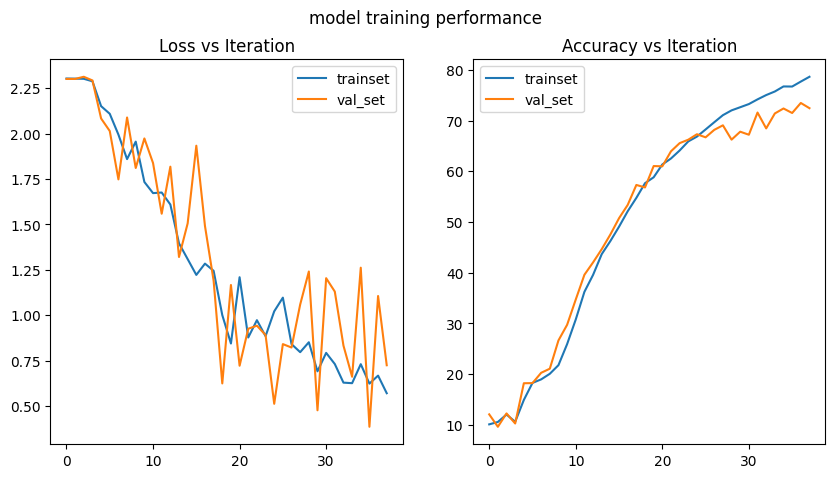

In [44]:
import matplotlib.pyplot as plt

fig, (ax1,ax2) = plt.subplots(1,2,figsize = (10,5))
fig.suptitle('model training performance')
ax1.plot(torch.Tensor(train_loss_log).cpu(),label = 'trainset')
ax1.plot(torch.Tensor(val_loss_log).cpu(),label = 'val_set')
ax1.legend()
ax1.set_title('Loss vs Iteration')

ax2.plot(torch.Tensor(train_acc_log).cpu(),label = 'trainset')
ax2.plot(torch.Tensor(val_acc_log).cpu(),label = 'val_set')
ax2.legend()
ax2.set_title('Accuracy vs Iteration')
plt.show()

- ### 3.2 Testing the model with test set

In [90]:
alexnet.eval()
corr_log = []
wrong_log = []
with torch.no_grad():
    test_corr = 0 
    for test_image, test_label in test_loader:
        test_image = test_image.to(device)
        test_label = test_label.to(device)
        test_yhat = alexnet(test_image)
        test_loss = criterion(test_yhat, test_label)
        test_predicted = torch.max(test_yhat, 1)[1]
        if len(corr_log) < 6:
            if test_predicted[0] == test_label[0]:
                corr_log.append((test_image[0],test_predicted[0]))
        if len(wrong_log) < 6:
            if test_predicted[0] != test_label[0]:
                wrong_log.append((test_image[0],test_predicted[0]))
        test_corr += (test_predicted == test_label).sum()
    test_acc = (test_corr * 100) / len(testset)
    
print(test_acc)

tensor(72.4500, device='cuda:2')


In [91]:
# print(test_predicted[0],test_label[0])
len(wrong_log),len(corr_log)

(6, 6)

In [92]:
print(f'Test accuracy = {"%.2f" %test_acc}')

Test accuracy = 72.45


- ### 3.3 Example of some correct and wrong prediction

In [93]:
lab_dic = {0:'airplanes', 1:'cars', 2:'birds', 3:'cats', 4:'deer', 5:'dogs', 6:'frogs', 7:'horses', 8:'ships', 9:'trucks'}

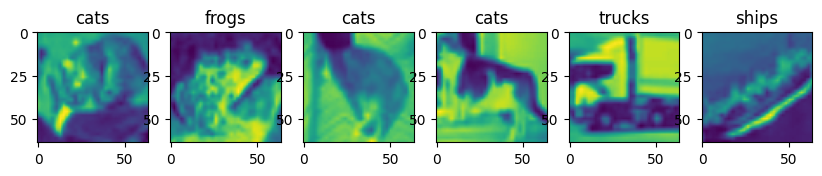

In [113]:

fig,plat = plt.subplots(1,6,figsize=(10,3))
# print(len(plat))
for (i,l),pla in zip(corr_log,plat):
    pla.imshow(i.cpu()[0])
    pla.set_title(lab_dic[l.cpu().item()])
plt.show()


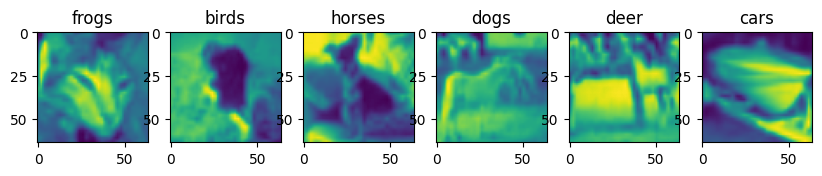

In [114]:

fig,plat = plt.subplots(1,6,figsize=(10,3))
# print(len(plat))
for (i,l),pla in zip(wrong_log,plat):
    pla.imshow(i.cpu()[0])
    pla.set_title(lab_dic[l.cpu().item()])
plt.show()



-----------------
## 4) Conclusion
- In this lab we use Alexnet argitechure to train CIFAR-10 Dataset, the result of loss function and accuracy can be observe in the Section 3.1.
- With 37 iteration of training, we manage to get 72.45 % accuracy with setting above.
- The wrong labeling is quite close to the answer ,figure above, if we train with lower Learning rate we might be able to get better performance.
    - Since we need to shared the resource, we quite happy with this result.

<br>

- ### Future work 
    - Train more to get better result.

    <br>

- ### Reference 
    - Alex Krizhevsky, Ilya Sutskever, and Geoffrey E. Hinton. 2017. ImageNet classification with deep convolutional neural networks. Commun. ACM 60, 6 (June 2017), 84–90. https://doi.org/10.1145/3065386
---------------------------
***************************

appendix
<img src = 'https://github.com/AtiChetsurakul/RTML_Labsession/blob/main/01_setup/training_log.png?raw=true'>